In [53]:
# PROBABILITY 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

In [54]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [55]:
np.random.randint(1,7) # roll dice 

4

In [56]:
few_rolls = np.random.randint(1, 7, size=10)
many_rolls = np.random.randint(1, 7, size=1000)

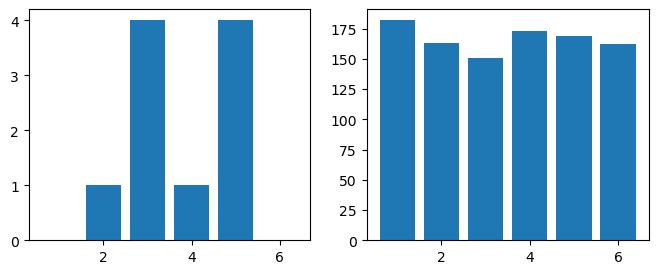

In [57]:
few_counts = np.histogram(few_rolls, bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.bar(np.arange(1, 7), few_counts)
ax2.bar(np.arange(1,7), many_counts);

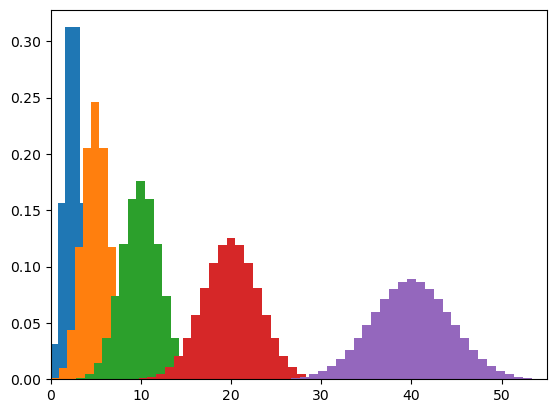

In [58]:
# DISTRIBUTIONS
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

b = ss.distributions.binom
for flips in [5, 10, 20, 40, 80]:
    success = np.arange(flips)
    our_generation = b.pmf(success, flips, 0.5)
    plt.hist(success, flips, weights=our_generation)
plt.xlim(0, 55)
plt.show()

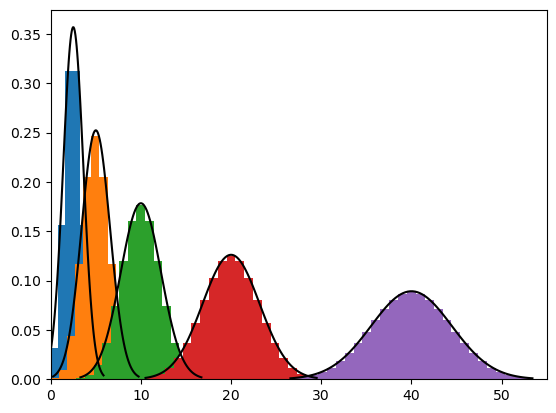

In [59]:
b = ss.distributions.binom
n = ss.distributions.norm

for flips in [5, 10, 20, 40, 80]:
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, 0.5)
    plt.hist(success, flips, weights=our_distribution)
    
    mu = flips * 0.5
    std_dev = np.sqrt(flips * 0.5 * (1 - 0.5))
    
    norm_x = np.linspace(mu - 3 * std_dev, mu + 3 * std_dev, 100)
    norm_pdf = n.pdf(norm_x, mu, std_dev)  # Calculate the normal distribution PDF
    
    plt.plot(norm_x, norm_pdf, 'k')
    
plt.xlim(0, 55)
plt.show()

In [60]:
# LINEAR COMBINATIONS, WEIGHTED SUMS, DOT PLOTS 
(2 * 12.50) + (12* .5) + (3 * 1.75)

36.25

In [61]:
2 + 12 + 3

17

In [62]:
quantity = [2, 12, 3]
costs = [12.5, .5, 1.75]
partial_cost = []
for q,c in zip(quantity, costs):
    partial_cost.append(q*c)
sum(partial_cost)

36.25

In [63]:
quantity = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])
np.sum(quantity * costs)

36.25

In [64]:
print(quantity.dot(costs),
     np.dot(quantity, costs),
     quantity @ costs,
      
     sep='\n')

36.25
36.25
36.25


In [65]:
for q_i, c_i in zip(quantity, costs):
    print("{:2d} {:5.2f} --> {:5.2f}".format(q_i, c_i, q_i * c_i))
    
print("Total:",
     sum(q*c for q,c in zip(quantity, costs)))

 2 12.50 --> 25.00
12  0.50 -->  6.00
 3  1.75 -->  5.25
Total: 36.25


In [66]:
values = np.array([10.0, 20.0, 30.0])
weights = np.full_like(values, 1/3)

print("weights:", weights)
print("via mean:", np.mean(values))
print("via weights and dot:", np.dot(weights, values))

weights: [0.33333333 0.33333333 0.33333333]
via mean: 20.0
via weights and dot: 20.0


In [67]:
values = np.array([10, 20, 30])
weights = np.array([.5, .25, .25])

np.dot(weights, values)

17.5

In [68]:
payoffs = np.array([1.0, -.5])
probs = np.array([.5, .5])
np.dot(payoffs, probs)

0.25

In [69]:
def is_even(n):
    return n % 2 == 0 

winnings = 0.0
for toss_ct in range(10000):
    die_toss = np.random.randint(1, 7)
    winnings += 1.0 if is_even(die_toss) else -0.5
print(winnings)

2542.0


In [70]:
values = np.array([5, -3, 2, 1])
squares = values * values 
print(squares,
     np.sum(squares),
     np.dot(values, values), sep="\n")

[25  9  4  1]
39
39


In [71]:
errors = np.array([5, -5, 3.2, -1.1])
display(pd.DataFrame({'errors':errors,
                     'squared': errors*errors}))

,errors,squared
0,5.0,25.00
1,-5.0,25.00
2,3.2,10.24
3,-1.1,1.21


In [72]:
np.dot(errors, errors)

61.45

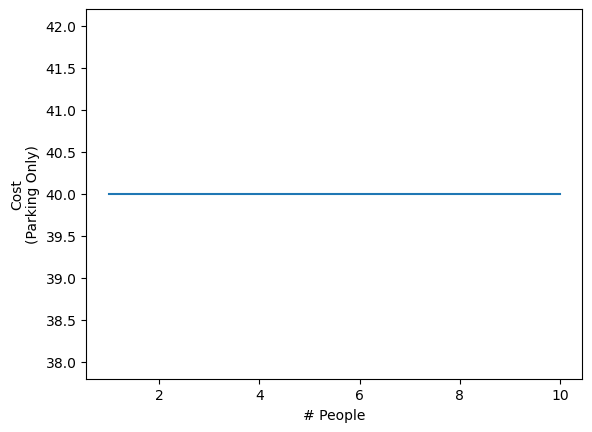

In [73]:
people = np.arange(1, 11)
total_cost = np.ones_like(people) * 40.0

ax = plt.gca()

ax.plot(people, total_cost)
ax.set_xlabel("# People")
ax.set_ylabel("Cost\n(Parking Only)");

In [74]:
people = np.arange(1, 11)
total_cost = 80.0 * people + 40.0

In [75]:
display(pd.DataFrame({'total cost':total_cost.astype(np.int)},
                    index=people).T)

,1,2,3,4,5,6,7,8,9,10
total cost,120,200,280,360,440,520,600,680,760,840


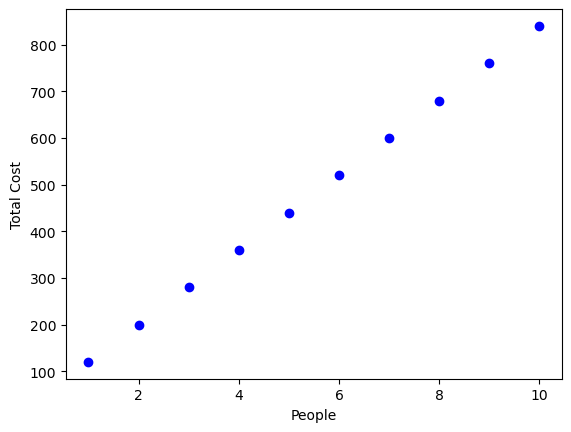

In [76]:
ax = plt.gca()
ax.plot(people, total_cost, 'bo')
ax.set_ylabel("Total Cost")
ax.set_xlabel("People");

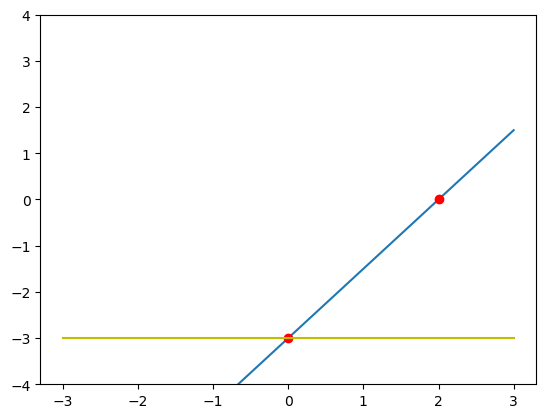

In [77]:
xs = np.linspace(-3, 3, 100)

m, b = 1.5, -3

ax = plt.gca()

ys = m*xs + b
ax.plot(xs, ys)

ax.set_ylim(-4, 4)

ax.plot(0, -3, 'ro')
ax.plot(2, 0, 'ro')

ys = 0*xs + b
ax.plot(xs, ys, 'y');

In [78]:
xs    = np.linspace(-3, 3, 100)
xs_p1 = np.c_[xs, np.ones_like(xs)]
pd.DataFrame(xs_p1).head()

,0,1
0,-3.000000,1.0
1,-2.939394,1.0
2,-2.878788,1.0
3,-2.818182,1.0
4,-2.757576,1.0


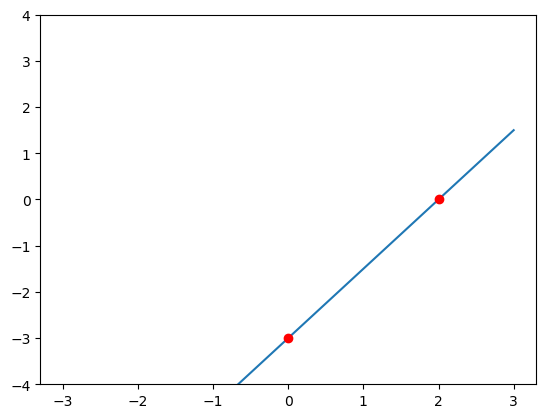

In [79]:
wgts = np.array([1.5, -3])
ys   = np.dot(xs_p1, wgts)

ax=plt.gca()
ax.plot(xs, ys)
ax.set_ylim(-4, 4)
ax.plot(0, -3, 'ro')
ax.plot(2, 0, 'ro');

In [80]:
# MULTIPLE DIMENSIONS
number_people = np.arange(1,11)
number_rbs    = np.arange(0,20)

number_people, number_rbs = np.meshgrid(number_people,
                                        number_rbs)
total_cost = (80 * number_people) + (10 * number_rbs) + 40

(0.0, 1.0, 0.0, 1.0)

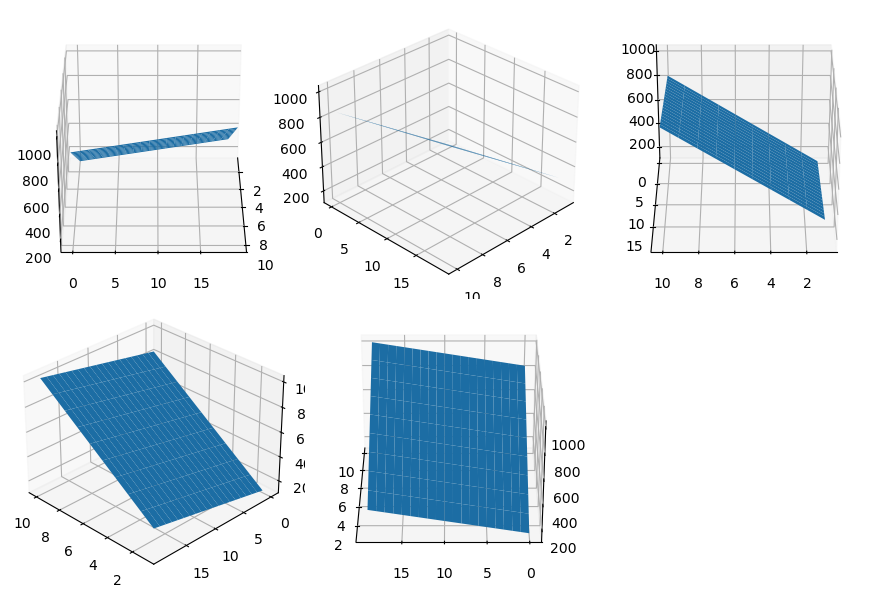

In [81]:
from mpl_toolkits.mplot3d import Axes3D
fig, axes = plt.subplots(2,3,
                         subplot_kw={'projection':'3d'},
                         figsize=(9,6),
                         tight_layout=True)
angles = [0, 45, 90, 135, 180]
for ax, angle in zip(axes.flat, angles):
    ax.plot_surface(number_people, number_rbs, total_cost)
    ax.azim = angle
axes.flat[-1].axis('off')

In [87]:
number_people  = np.array([2,3])
number_rbs     = np.array([0,1,2])
number_hotdogs = np.array([2,4])

costs = np.array([80, 10, 5])

columns = ['People', 'Rootbeers', 'HogDogs', 'TotalCost']

# Compute the Cartesian product using itertools.product
counts = np.array(list(itertools.product(number_people, number_rbs, number_hotdogs)))

totals = (costs[0] * counts[:, 0] +
          costs[1] * counts[:, 1] +
          costs[2] * counts[:, 2]) + 40

data = np.column_stack((counts, totals))
df = pd.DataFrame(data, columns=columns)
display(df.head(8))

,People,Rootbeers,HogDogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,2,1,2,220
3,2,1,4,230
4,2,2,2,230
5,2,2,4,240
6,3,0,2,290
7,3,0,4,300


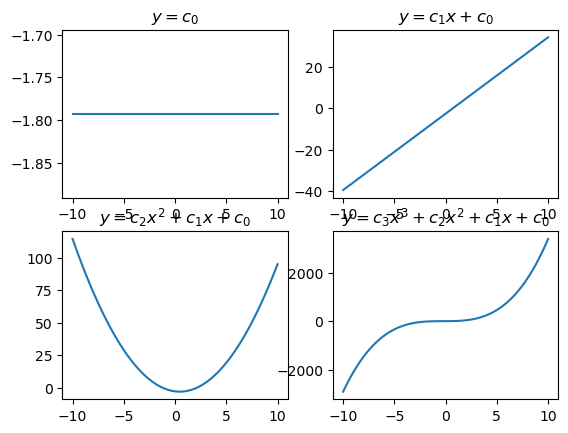

In [89]:
fig, axes = plt.subplots(2,2)

titles = ["$y=c_0$", 
          "$y=c_1x+c_0$",
          "$y=c_2x^2+c_1x+c_0$",
          "$y=c_3x^3+c_2x^2+c_1x+c_0$"]

xs = np.linspace(-10, 10, 100)
for power, (ax, title) in enumerate(zip(axes.flat, titles), 1):
    coeffs = np.random.uniform(-5, 5, power)
    poly = np.poly1d(coeffs)
    ax.plot(xs, poly(xs))
    ax.set_title(title)

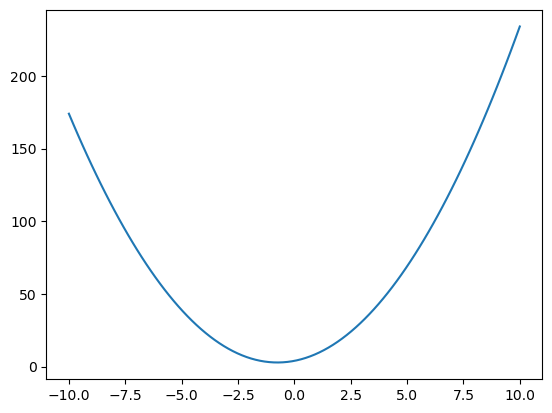

In [90]:
plt.Figure((2,1.5))

xs = np.linspace(-10, 10, 100)
coeffs = np.array([2,3,4])
ys = np.dot(coeffs, [xs**2, xs**1, xs**0])

plt.plot(xs, ys)

In [92]:
# MATH IN COMPUTERS 
oned_vec = np.arange(5)
print(oned_vec, "-->", oned_vec * oned_vec)
print("self dot:", np.dot(oned_vec, oned_vec))

[0 1 2 3 4] --> [ 0  1  4  9 16]
self dot: 30


In [93]:
row_vec = np.arange(5).reshape(1,5)
col_vec = np.arange(0, 50, 10).reshape(5, 1)
print("row vec:", row_vec,
      "col_vec:", col_vec,
      "dot", np.dot(row_vec, col_vec), sep='\n')

row vec:
[[0 1 2 3 4]]
col_vec:
[[ 0]
 [10]
 [20]
 [30]
 [40]]
dot
[[300]]


In [94]:
out = np.dot(col_vec, row_vec)
print(out)

[[  0   0   0   0   0]
 [  0  10  20  30  40]
 [  0  20  40  60  80]
 [  0  30  60  90 120]
 [  0  40  80 120 160]]


In [95]:
out = np.dot(row_vec, col_vec)
out

array([[300]])

In [96]:
col_vec = np.arange(0, 50, 10).reshape(5, 1)
row_vec = np.arange(0, 5).reshape(1,5)

oned_vec = np.arange(5)

np.dot(oned_vec, col_vec)

array([300])

In [97]:
try:
    np.dot(col_vec, oned_vec)
except ValueError as e:
    print("I went boom:", e)

I went boom: shapes (5,1) and (5,) not aligned: 1 (dim 1) != 5 (dim 0)


In [98]:
print(oned_vec.shape,
     col_vec.shape, sep="\n")

(5,)
(5, 1)


In [101]:
print(np.dot(row_vec, oned_vec))
try: print(np.dot(oned_vec, row_vec))
except: print("boom")

[30]
boom


In [103]:
oned_vec = np.array([1, 2, 3, 4, 5])
col_vec = np.array([[1], [2], [3], [4], [5]])
row_vec = np.array([1, 2, 3, 4, 5])

result1 = np.allclose(np.dot(oned_vec.reshape(1, 5), col_vec),
                      np.dot(oned_vec, col_vec))

result2 = np.allclose(np.dot(row_vec, oned_vec.reshape(5, 1)),
                      np.dot(row_vec, oned_vec))

print(result1, result2)

True True


In [111]:
D = np.array([[1,3],
             [2, 5],
             [2,7],
             [3,2]])
w = np.array([1.5,2.5])

In [112]:
np.dot(D,w)

array([ 9. , 15.5, 20.5,  9.5])

In [113]:
try:
    np.dot(w,D)
except ValueError:
    print("BOOM. :sadface:")

BOOM. :sadface:


In [114]:
def rdot(arr, brr):
    return np.dot(brr, arr)

rdot(w,D)

array([ 9. , 15.5, 20.5,  9.5])